<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_DM/blob/main/Lab_4_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM Lab 4: Association Rules - FP-Growth using **mlxtend** API
# 21130429 - Phạm Tiến Lộc


---



# Import libraries

In [38]:
#import libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
from datetime import datetime
# https://www.kaggle.com/code/mervetorkan/association-rules-with-python
# https://www.kaggle.com/code/rjmanoj/fp-growth-algorithm-frequent-itemset-pattern

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/gdrive
/content/gdrive/MyDrive/data


#Task 1. Apply Apriori algorithm to **dataset41** with transactions from 11 items : {JAM, MAGGI, SUGAR, COFFEE, CHEESE, TEA, BOURNVITA, CORNFLAKES, BREAD, BISCUIT, MILK}

#Task 1.1. Prepare dataset (load transactions from **dataset41.csv** and preprocess them)

In [3]:
#code
ds41 = pd.read_csv('dataset41.csv')
transactions = [transaction.replace(',', ' ').split() for transaction in ds41.iloc[:, 0]]
print(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'], ['BREAD', 'TEA', 'BOURNVITA'], ['JAM', 'MAGGI', 'BREAD', 'MILK'], ['MAGGI', 'TEA', 'BISCUIT'], ['BREAD', 'TEA', 'BOURNVITA'], ['MAGGI', 'TEA', 'CORNFLAKES'], ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'], ['JAM', 'MAGGI', 'BREAD', 'TEA'], ['BREAD', 'MILK'], ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'], ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'], ['COFFEE', 'SUGER', 'BOURNVITA'], ['BREAD', 'COFFEE', 'COCK'], ['BREAD', 'SUGER', 'BISCUIT'], ['COFFEE', 'SUGER', 'CORNFLAKES'], ['BREAD', 'SUGER', 'BOURNVITA'], ['BREAD', 'COFFEE', 'SUGER'], ['BREAD', 'COFFEE', 'SUGER'], ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]


#Task 1.2. Apply FP-Growth to the preprocessed dataset with min_supp = 50% and min_conf = 50%

In [4]:
#code
a = TransactionEncoder()
a_data = a.fit(transactions).transform(transactions)
ds41 = pd.DataFrame(a_data,columns=a.columns_)

fpg = fpgrowth(ds41, min_support=0.2, use_colnames=True)
fpg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.631579,(BREAD)
1,0.315789,(CORNFLAKES)
2,0.315789,(BISCUIT)
3,0.210526,(MILK)
4,0.368421,(TEA)
5,0.210526,(BOURNVITA)
6,0.263158,(MAGGI)
7,0.421053,(COFFEE)
8,0.315789,(SUGER)
9,0.210526,"(CORNFLAKES, COFFEE)"


#Task 1.3. Report association rules obtained from Task 1.2 (include their support, confidence, and lift)

In [5]:
#code
rules = association_rules(fpg, metric = "confidence", min_threshold=0.2)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CORNFLAKES),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842,0.538462
1,(COFFEE),(CORNFLAKES),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421,0.636364
2,(TEA),(BREAD),0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649,-0.142857
3,(BREAD),(TEA),0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368,-0.222222
4,(MAGGI),(TEA),0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895,0.732143
5,(TEA),(MAGGI),0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298,0.854167
6,(SUGER),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842,0.538462
7,(COFFEE),(SUGER),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421,0.636364
8,(SUGER),(BREAD),0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263,0.076923
9,(BREAD),(SUGER),0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316,0.142857


#Task 2. Apply **FP-Growth** algorithm to **dataset42** with transactions related to income

#Task 2.1. Prepare dataset (load transactions from dataset42.csv and preprocess them)

In [31]:
#code
ds42 = pd.read_csv('dataset42.csv')
imputer = SimpleImputer(missing_values="?", strategy='most_frequent')
ds42.iloc[:, :] = imputer.fit_transform(ds42.iloc[:, :])

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
ds42['fnlwgt-bin'] = discretizer.fit_transform(ds42[['fnlwgt']])
ds42['age-bin'] = discretizer.fit_transform(ds42[['age']])
ds42['hours.per.week-bin'] = discretizer.fit_transform(ds42[['hours.per.week']])
ds42

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,fnlwgt-bin,age-bin,hours.per.week-bin
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0.0,4.0,1.0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,1.0,4.0,0.0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,1.0,4.0,1.0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,1.0,3.0,1.0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,2.0,0.0,1.0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,2.0,0.0,1.0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1.0,1.0,1.0
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,1.0,3.0,1.0


#Task 2.2. Apply Apriori to the preprocessed dataset with min_supp = 50% and min_conf = 50% (*modify min_supp and min_conf if proposed values are not appropriate*)

In [33]:
#code
ds42_dummies = pd.get_dummies(ds42)
ds42_tf = ds42_dummies > 0
itemsets = apriori(ds42_tf, min_support=0.5, use_colnames=True)
itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,1.000000,(age)
1,1.000000,(fnlwgt)
2,1.000000,(education.num)
3,1.000000,(hours.per.week)
4,0.705445,(fnlwgt-bin)
...,...,...
794,0.515033,"(workclass_Private, hours.per.week-bin, fnlwgt..."
795,0.502626,"(hours.per.week-bin, fnlwgt, hours.per.week, r..."
796,0.515924,"(hours.per.week-bin, fnlwgt, hours.per.week, r..."
797,0.515033,"(workclass_Private, hours.per.week-bin, fnlwgt..."


#Task 2.3. Report association rules obtained from Task 2.2 (include their **support**, **confidence**, and **lift**)

In [15]:
#code
rules = association_rules(itemsets, metric="confidence", min_threshold=0.5)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(education.num),(age),1.000000,0.701760,0.701760,0.701760,1.000000,0.000000,1.000000,0.000000
1,(age),(education.num),0.701760,1.000000,0.701760,1.000000,1.000000,0.000000,inf,0.000000
2,(hours.per.week),(age),0.874420,0.701760,0.642364,0.734616,1.046820,0.028731,1.123808,0.356159
3,(age),(hours.per.week),0.701760,0.874420,0.642364,0.915361,1.046820,0.028731,1.483710,0.149967
4,(race_White),(age),0.854274,0.701760,0.602009,0.704702,1.004193,0.002514,1.009965,0.028654
...,...,...,...,...,...,...,...,...,...,...
651,(hours.per.week),"(native.country_United-States, education.num, ...",0.874420,0.550874,0.502626,0.574810,1.043452,0.020931,1.056296,0.331603
652,(race_White),"(native.country_United-States, hours.per.week,...",0.854274,0.557630,0.502626,0.588366,1.055119,0.026257,1.074669,0.358478
653,(native.country_United-States),"(hours.per.week, education.num, race_White, se...",0.913762,0.537852,0.502626,0.550062,1.022702,0.011157,1.027137,0.257401
654,(sex_Male),"(native.country_United-States, hours.per.week,...",0.669205,0.696877,0.502626,0.751078,1.077778,0.036272,1.217747,0.218158


#Task 2.4. Apply FP-Growth with different values of support and plot the running time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


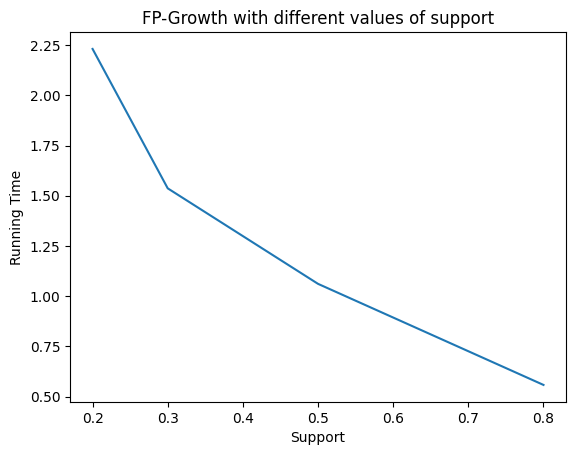

In [43]:
#code
supp_param = [0.2, 0.3, 0.5, 0.8]
run_times1 = []
for supp in supp_param:
  bt = datetime.now()
  fpg = fpgrowth(ds42_tf, min_support=supp, use_colnames=True)
  et = datetime.now()
  run_times1.append((et-bt).total_seconds())

plt.plot(supp_param, run_times1)
plt.title('FP-Growth with different values of support')
plt.xlabel('Support')
plt.ylabel('Running Time')
plt.show()

#Task 2.5. Compare the running time between FP-Growth and Apriori (done in Task 2.4 Lab 3) with different support values. Remember using matplotlib/seaborn to plot the running time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


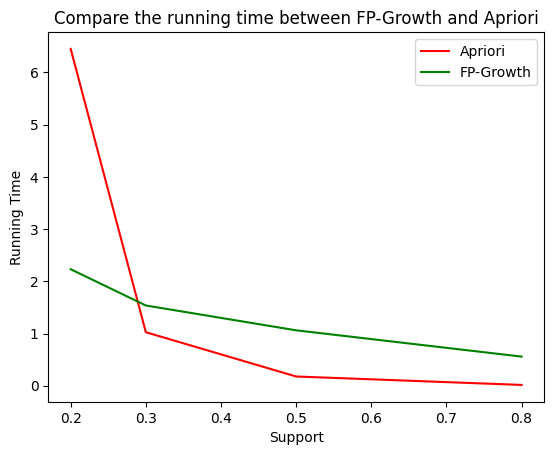

In [45]:
#code
supp_param = [0.2, 0.3, 0.5, 0.8]
run_times2 = []
for supp in supp_param:
  bt = datetime.now()
  itemsets = apriori(ds42_tf, min_support=supp, use_colnames=True)
  et = datetime.now()
  run_times2.append((et-bt).total_seconds())

plt.plot(supp_param, run_times2, c='red', label='Apriori')
plt.plot(supp_param, run_times1, c='green', label='FP-Growth')
plt.xlabel('Support')
plt.ylabel('Running Time')
plt.title('Compare the running time between FP-Growth and Apriori')
plt.legend()
plt.show()

#Task 3. Apply **FP-Growth** to dataset 3 using **mlxtend** API
The dataset contains 435 voting records on 16 different features ranged fromeducation to defense. The main objective of the task is to use association mining to find the combination of attributes has the highest confidence with either republican or democrat

#Task 3.1. Preprocessing dataset, plot the missing rate for each attribute. Then, remove the high missing attributes (?: missing). Other missing values will be imputed by 'y'

*   **Task 3.1, 3.2, 3.3 done in Lab #3**





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


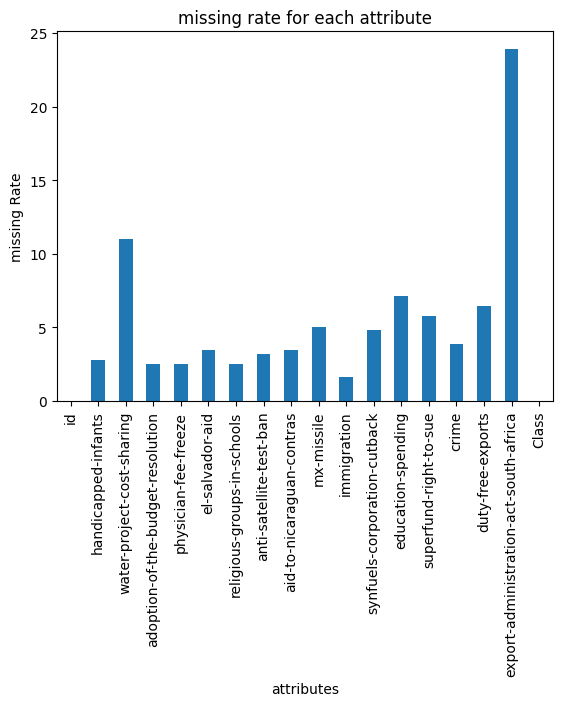

<ipython-input-55-38c84bf9eefa>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace('?', 'y', inplace=True)


In [55]:
#code
ds3 = pd.read_csv('dataset3.csv')
data = ds3.dropna()
missing_rate = (data == '?').mean() * 100
missing_rate.plot(kind='bar')
plt.title('missing rate for each attribute')
plt.xlabel('attributes')
plt.ylabel('missing Rate')
plt.show()

# remove the high missing attributes
data = data.loc[:, missing_rate < 10]

# missing values will be imputed by 'y'
data.replace('?', 'y', inplace=True)

#Task 3.2. Convert **Class** attribute to 2 columns based on its values (republican, democrat).

In [56]:
#code
data = pd.get_dummies(data, columns=['Class'], prefix='', prefix_sep='', drop_first=False)
data.replace({True: 'y', False: 'n'}, inplace=True)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,handicapped-infants,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,democrat,republican
0,1,n,n,y,y,y,n,n,n,y,y,y,y,y,n,n,y
1,2,n,n,y,y,y,n,n,n,n,n,y,y,y,n,n,y
2,3,y,y,y,y,y,n,n,n,n,y,n,y,y,n,y,n
3,4,n,y,n,y,y,n,n,n,n,y,n,y,n,n,y,n
4,5,y,y,n,y,y,n,n,n,n,y,y,y,y,y,y,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,431,n,y,y,y,y,n,n,y,y,n,y,y,y,n,n,y
431,432,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,n
432,433,n,n,y,y,y,n,n,n,n,y,y,y,y,n,n,y
433,434,n,n,y,y,y,y,y,y,y,n,y,y,y,n,n,y


#Task 3.3. Drop unnecessary columns from the dataset(Class, id)

In [57]:
#code
data.drop(columns=['id'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Task 3.4 Apply **FP-Growth** algorithm to the preprocessed dataset with your min_supp and min_conf

In [58]:
#code
data = data.replace({'y': 1, 'n': 0})

fpg = fpgrowth(data, min_support=0.1, use_colnames=True)
fpg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-58-31345638da2b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'y': 1, 'n': 0})
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.650575,(religious-groups-in-schools)
1,0.609195,(crime)
2,0.537931,(superfund-right-to-sue)
3,0.521839,(el-salvador-aid)
4,0.512644,(immigration)
...,...,...
917,0.108046,"(crime, mx-missile, democrat, anti-satellite-t..."
918,0.103448,"(crime, adoption-of-the-budget-resolution, mx-..."
919,0.105747,"(crime, adoption-of-the-budget-resolution, mx-..."
920,0.103448,"(crime, mx-missile, democrat, religious-groups..."


#Task 3.5. Report the rules obtained from the Task 3.4.

In [59]:
#code
rules = association_rules(fpg, metric = "confidence", min_threshold=0.2)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(crime),(religious-groups-in-schools),0.609195,0.650575,0.528736,0.867925,1.334089,0.132409,2.645649,0.640793
1,(religious-groups-in-schools),(crime),0.650575,0.609195,0.528736,0.812721,1.334089,0.132409,2.086749,0.716676
2,(crime),(democrat),0.609195,0.613793,0.229885,0.377358,0.614798,-0.144035,0.620272,-0.615863
3,(democrat),(crime),0.613793,0.609195,0.229885,0.374532,0.614798,-0.144035,0.624819,-0.618658
4,"(crime, democrat)",(religious-groups-in-schools),0.229885,0.650575,0.188506,0.820000,1.260424,0.038948,1.941252,0.268293
...,...,...,...,...,...,...,...,...,...,...
15838,"(crime, aid-to-nicaraguan-contras)","(mx-missile, religious-groups-in-schools)",0.220690,0.211494,0.103448,0.468750,2.216372,0.056774,1.484246,0.704228
15839,"(crime, mx-missile)","(aid-to-nicaraguan-contras, religious-groups-i...",0.188506,0.264368,0.103448,0.548780,2.075822,0.053613,1.630320,0.638653
15840,"(aid-to-nicaraguan-contras, religious-groups-i...","(crime, mx-missile)",0.264368,0.188506,0.103448,0.391304,2.075822,0.053613,1.333169,0.704514
15841,"(mx-missile, aid-to-nicaraguan-contras)","(crime, religious-groups-in-schools)",0.489655,0.528736,0.103448,0.211268,0.399571,-0.155450,0.597496,-0.746479


#Task 3.6. Filter all rules X => Y with Y belonging to {**republican**, **democrat**}

In [60]:
#code
filter_rules = rules[(rules['consequents'].apply(lambda x: 'republican' in x or 'democrat' in x))]
filter_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(crime),(democrat),0.609195,0.613793,0.229885,0.377358,0.614798,-0.144035,0.620272,-0.615863
5,"(crime, religious-groups-in-schools)",(democrat),0.528736,0.613793,0.188506,0.356522,0.580850,-0.136029,0.600186,-0.604935
7,(crime),"(democrat, religious-groups-in-schools)",0.609195,0.303448,0.188506,0.309434,1.019726,0.003646,1.008668,0.049498
9,(religious-groups-in-schools),"(crime, democrat)",0.650575,0.229885,0.188506,0.289753,1.260424,0.038948,1.084291,0.591303
16,(superfund-right-to-sue),(democrat),0.537931,0.613793,0.202299,0.376068,0.612696,-0.127880,0.618989,-0.577711
...,...,...,...,...,...,...,...,...,...,...
15811,"(adoption-of-the-budget-resolution, mx-missile)","(crime, aid-to-nicaraguan-contras, democrat)",0.468966,0.142529,0.103448,0.220588,1.547676,0.036607,1.100152,0.666378
15812,"(aid-to-nicaraguan-contras, mx-missile)","(adoption-of-the-budget-resolution, crime, dem...",0.489655,0.177011,0.103448,0.211268,1.193525,0.016774,1.043432,0.317718
15826,"(crime, mx-missile, religious-groups-in-schools)",(democrat),0.131034,0.613793,0.103448,0.789474,1.286221,0.023020,1.834483,0.256085
15829,"(crime, mx-missile)","(democrat, religious-groups-in-schools)",0.188506,0.303448,0.103448,0.548780,1.808481,0.046247,1.543709,0.550897


#Task 3.7. Compare the running time between **FP-Growth** and **Apriori** (done in Task 3.4 Lab 3) with different support values with different values of min_supp. Remember using Prettytable and matplotlib/seaborn to plot the running time

**Susgestion: consider the following figure:**
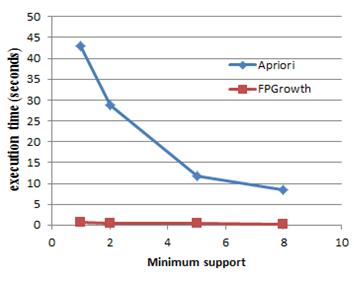

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py

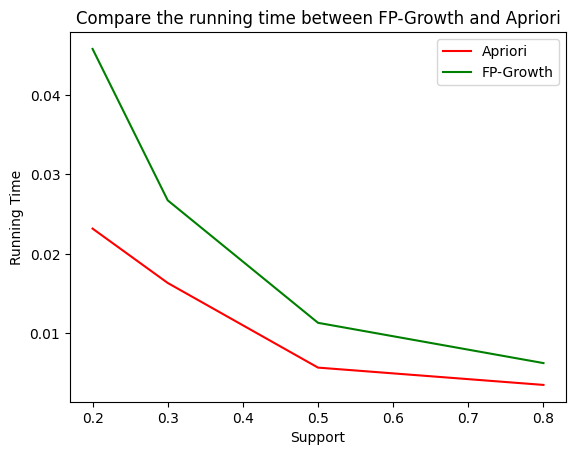

In [61]:
#code
supp_param = [0.2, 0.3, 0.5, 0.8]
run_times3 = []
for supp in supp_param:
  bt = datetime.now()
  fpg = fpgrowth(data, min_support=supp, use_colnames=True)
  et = datetime.now()
  run_times3.append((et-bt).total_seconds())


run_times4 = []
for supp in supp_param:
  bt = datetime.now()
  itemsets = apriori(data, min_support=supp, use_colnames=True)
  et = datetime.now()
  run_times4.append((et-bt).total_seconds())

plt.plot(supp_param, run_times4, c='red', label='Apriori')
plt.plot(supp_param, run_times3, c='green', label='FP-Growth')
plt.xlabel('Support')
plt.ylabel('Running Time')
plt.title('Compare the running time between FP-Growth and Apriori')
plt.legend()
plt.show()